<a href="https://colab.research.google.com/github/masoudinejad/dt_pruning/blob/main/orap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimized Resource Aware Pruning (ORAP)

In this session you will see:
- [1 - Resource demand calculation of decision trees](#1)
- [2 - The general concept of global optimization](#2) 
- [3 - ORAP algorithm](#3)
- [4 - ORAP Performance](#4)
- [5 - ORAP vs CCP](#5)

Loading packages and preparing the basics

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from dt_functions import *

In [14]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)
cls_dt = DecisionTreeClassifier(random_state=0)
_ = cls_dt.fit(X_train, y_train)

<a name="1"></a>
## 1 - Decision tree resource demand


Different type of resources

Formulation of the APD

<a name="2"></a>
## 2 - Pruning as an optimization problem 

<a name="2.1"></a>
## 2.1 - Average Probabilistic Depth (APD)

APD can be calculated from two different formulation. Initially it is explained using the naming by finding the depth of each leaf and probability of reaching that leaf from the relative number of samples in that leaf.

Number of samples in a node $n$ is shown using $\sigma(n)$, accordingly, $\left|\sigma\right|$ shows the total number of samples or number of samples in the root node.
Each leaf is shown using $l$ while set of all leaves is $\Lambda$. Therefore, probability of reaching each leaf is defined as:
$$
\mathbb{P}(l)=\frac{\sigma(l)}{\left|\sigma\right|}
$$

Depth of a leaf is defined by the number of inner-node necessary to reach that leaf. To be noted that the leaf itself is not counted. This is due to the fact that APD is to formulated to quantize the resource needs for the inference and a leaf does not require a comparison.

When the depth of a leaf $l$ is shown using $d_l$, APD of a decision tree $T$ can be formulated as:
$$
A(T) = \sum\limits_{\forall \,l \in \Lambda}\left(\mathbb{P}(l) \cdot d_l\right)
$$

This formulation explains the calculation of the APD in a very general sense. Obviously it can be applied for any branch (subtree) of the main tree.

From this formulation, it can be seen that the denominator of the probability is a constant and can be extracted from the summation. In addition, if we check each inner-node till reaching a leaf, depth change is adding only one. Therefore, calculation of the APD can be reformulated as:

$$
A(T) = \frac{1}{\left|\sigma\right|}\sum\limits_{\forall \, n \in T}(\sigma(n))
$$

This simpler form of APD requires summing the number of samples in each inner-node within the tree (or branch). Since the number of total samples in a tree does not change during the pruning, it is easier to remove the denominator and use the absolute value for the APD evaluation.

A function named is provided here which calculates the APD for your tree. Try it for yourself.

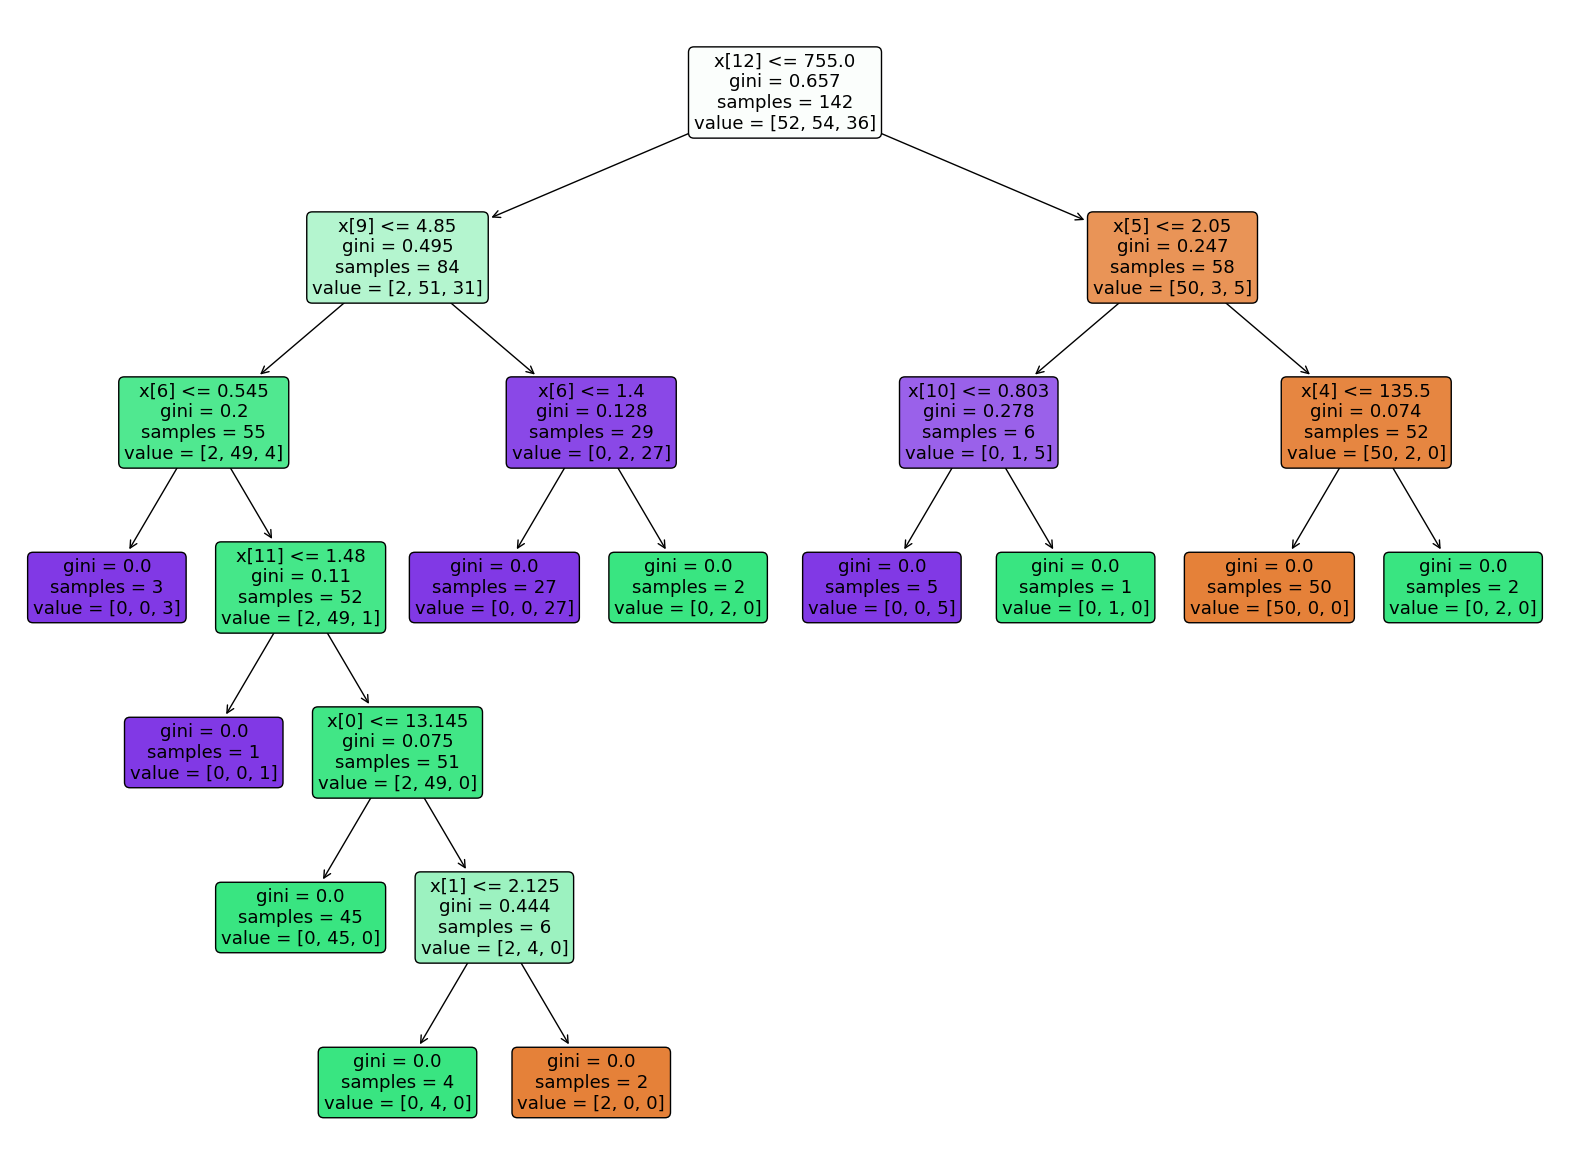

In [15]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(cls_dt, filled=True, rounded=True)

In [16]:
print(get_APD(cls_dt))

3.767605633802817


<a name="2.2"></a>
## 2.2 - Benefit of using APD

While traditional tree pruning methods use number of nodes or leaves as a cost factor, here you can see the benefit of using APD to capture the probabilistic effect of samples distribution in the tree.
In the below figures both network have similar number of nodes and leaves.

<div> <img src="Figures/Topology1.png" alt="A DT" style="width: 200px;"/></div> 
<div> <img src="Figures/Topology2.png" alt="A DT" style="width: 200px;"/></div>

Although both trees have 5 nodes and 6 leaves, their APD is different, First tree has a 2.7 APD, and the second one has an APD of 2.8.

<a name="3"></a>
## 3 - ORAP algorithm

Challenge of searching for the global optimal solution(s).

Overall algorithm

<a name="4"></a>
## 4 - ORAP performance

Changes in the accuracy according to the APD and number of nodes.

<a name="5"></a>
## 5 - ORAP vs CCP

Comparison of ORAP and CCP according to the APD and number of nodes.